<a href="https://colab.research.google.com/github/UmaGhildiyal/Deep_Neural_Networks_YT/blob/main/13_cnn_cifar10_small_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h1>**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
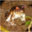

In [5]:
X_train[0]

In [6]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is 2-D. Thus will reshape it.

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

#  y_train.reshape(-1,) ---> -1 for no changes, blank for flatten

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

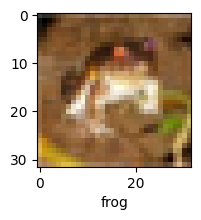

In [12]:
plot_sample(X_train, y_train, 0)

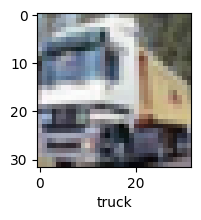

In [13]:
plot_sample(X_train, y_train, 1)

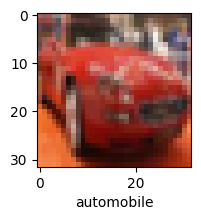

In [14]:
plot_sample(X_train, y_train, 5)

# **SCALING DATA**

In [10]:
X_train = X_train/255
X_test = X_test/255

# **Model Building (ANN)**

In [41]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8118 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6240 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5435 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4815 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4317 - accuracy: 0.4939


y ---> one hot encoded ---> sparse_categorical_crossentropy

y ---> 'ship' ---> categorical_crossentropy

In [17]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4470 - accuracy: 0.4863


[1.4469969272613525, 0.486299991607666]

In [42]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.49      0.54      1000
           1       0.63      0.57      0.60      1000
           2       0.42      0.30      0.35      1000
           3       0.38      0.30      0.33      1000
           4       0.44      0.41      0.42      1000
           5       0.37      0.42      0.39      1000
           6       0.45      0.65      0.53      1000
           7       0.54      0.57      0.56      1000
           8       0.55      0.70      0.62      1000
           9       0.57      0.53      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



# **Model Buidling (CNN)**

In [11]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    # softmax ---> like sigmoid but normalizes probablity
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.1437 - accuracy: 0.6005
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9440 - accuracy: 0.6707
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8060 - accuracy: 0.7183
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7048 - accuracy: 0.7545
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6178 - accuracy: 0.7842
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5415 - accuracy: 0.8108
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4749 - accuracy: 0.8328
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4118 - accuracy: 0.8556
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3570 - accuracy: 0.8741
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.307

In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1761 - accuracy: 0.6854


[1.1760694980621338, 0.6854000091552734]

In [20]:
y_test = y_test.reshape(-1,)

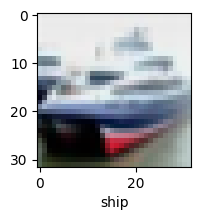

In [23]:
plot_sample(X_test, y_test, 1)

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.9292188e-03, 3.9004975e-05, 1.6011795e-03, 8.6626250e-01,
        2.8569028e-05, 1.2900233e-01, 1.1191565e-03, 1.4340743e-05,
        3.6305996e-06, 8.1224641e-08],
       [1.5173536e-03, 2.3082686e-03, 4.4107335e-08, 3.6900005e-10,
        3.5074526e-12, 4.8805071e-11, 3.2408593e-11, 3.5773077e-15,
        9.9525249e-01, 9.2188944e-04],
       [3.7514694e-02, 2.2328593e-01, 1.3543577e-03, 6.5407407e-04,
        5.4879738e-03, 5.6239846e-04, 7.2268367e-06, 7.8144047e-05,
        7.2537565e-01, 5.6795632e-03],
       [9.8844981e-01, 2.0782744e-04, 5.0923657e-03, 1.4969483e-05,
        4.0926519e-04, 4.0945565e-08, 2.0607867e-07, 7.8906287e-06,
        5.8139502e-03, 3.6901638e-06],
       [4.6261923e-09, 2.6875234e-06, 4.1540846e-02, 1.2988550e-02,
        3.5040903e-01, 9.8485631e-05, 5.9495723e-01, 1.5519075e-06,
        1.4159523e-06, 1.5509228e-07]], dtype=float32)

In [32]:
# argmax() return index of max value

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1]

In [33]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

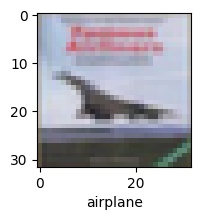

In [37]:
plot_sample(X_test, y_test, 3)

In [38]:
classes[y_classes[3]]

'airplane'

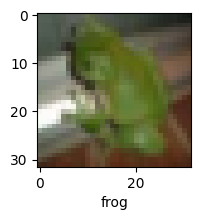

In [34]:
plot_sample(X_test, y_test, 7)

In [35]:
classes[y_classes[7]]

'bird'

In [43]:
print("Classification Report: \n",classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.67      0.71      1000
           1       0.83      0.78      0.81      1000
           2       0.55      0.64      0.59      1000
           3       0.51      0.51      0.51      1000
           4       0.63      0.60      0.61      1000
           5       0.54      0.64      0.59      1000
           6       0.83      0.69      0.75      1000
           7       0.73      0.74      0.73      1000
           8       0.79      0.81      0.80      1000
           9       0.77      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

